In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import time
import openslide
import openslide_generator
import importlib
importlib.reload(openslide_generator)

<module 'openslide_generator' from 'c:\\Users\\arno\\Documents\\fourthbrain\\capstone\\repos\\keras-OpenSlideGenerator\\openslide_generator.py'>

## various fetching modes

In [3]:
gen_train = openslide_generator.OpenSlideGenerator(
        'C:/Users/arno/Documents/fourthbrain/capstone/data/labels/labels_train.txt', 
        'C:/Users/arno/Documents/fourthbrain/capstone/data/training/', 512, 256)

0 45
50465.1133 55940.7969
55052.8477 56236.7812
59048.6211 56680.7539
63562.3633 58382.6562
67262.1484 59344.6016
71405.9141 62896.3984
76881.6016 67484.1406
78509.5078 76067.6484
80655.3828 77695.5547
80137.4141 79545.4453
78953.4844 79545.4453
78213.5234 82801.2578
76511.6172 85243.1172
75697.6641 88572.9297
76363.625 90422.8203
78213.5234 92124.7266
77695.5547 94492.5938
73995.7656 95454.5391
70517.9609 96638.4688
67188.1562 97452.4219
63858.3438 100412.25
62600.418 101744.18
53868.918 101522.188
52315.0039 100190.266
49355.1758 99894.2812
45803.3789 96268.4922
44693.4414 95824.5156
44915.4297 94196.6094
41289.6367 90792.8047
39735.7266 91088.7891
35739.9531 86649.0391
34926 84873.1406
39069.7617 84799.1484
39587.7344 84947.1406
39439.7422 82209.2969
36775.8945 82135.2969
36479.9102 79619.4453
32854.1211 79397.4531
31596.1914 75919.6562
33224.0977 73329.8047
33372.0898 70591.9609
34926 67558.1328
34704.0117 64820.2891
40253.6953 58678.6406
48245.2383 55940.7969
1 13
81612.5391 2751

In [4]:
gen_train.label_to_use = 0

gen_train.fetch_mode = 'area'
# gen_train.fetch_mode = 'slide'
# gen_train.fetch_mode = 'label'
# gen_train.fetch_mode = 'label-slide'

In [5]:
t_start = time.time()
positions = dict()
gen_train.reset_fetch_count()
for i in range(2000):
    if i % 500 == 0:
        print(i)
    _, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    if not slide_id in positions:
        positions[slide_id] = []
    positions[slide_id].append((posx, posy, label))
print(time.time() - t_start)

0
500
1000
1500
57.47258114814758


In [6]:
gen_train.fetch_count

[[56, 4, 43],
 [36, 2, 37],
 [34, 9, 16],
 [56, 5],
 [11, 8, 2, 8],
 [25, 14],
 [105, 73],
 [0, 0, 0, 0, 0, 0, 0, 11, 22, 10, 17],
 [137, 60, 51],
 [9, 6, 9, 11],
 [107],
 [182],
 [71, 2],
 [278],
 [2, 0, 0, 0, 0, 34, 45],
 [27],
 [9, 2, 25],
 [124, 38, 14, 0, 1, 2],
 [36, 22],
 [20, 72]]

In [7]:
gen_train.total_loop_count

2010

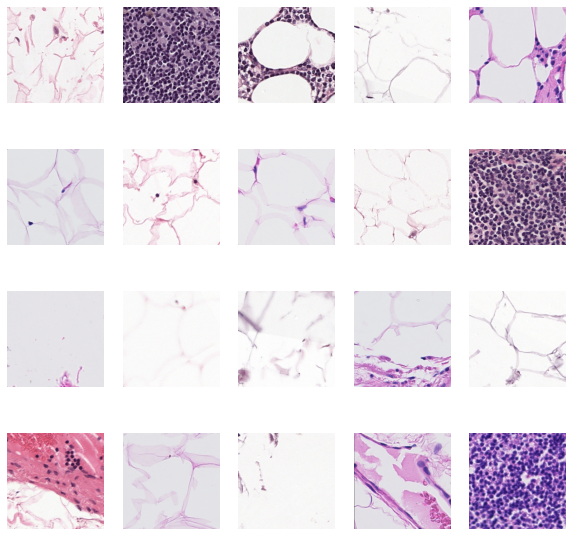

In [12]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))
    plt.axis('off')